Estimated Coefficients:
b_0 =163017544.9474316 \ 
b_1 = 88146563.86056817


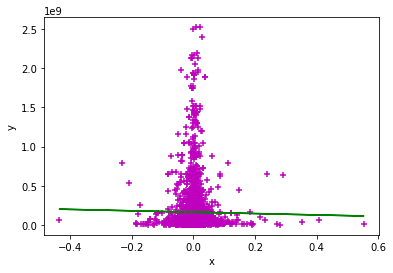

Estimated Coefficients:
b_0 =22276022969.89295 \ 
b_1 = -34581713723.89672


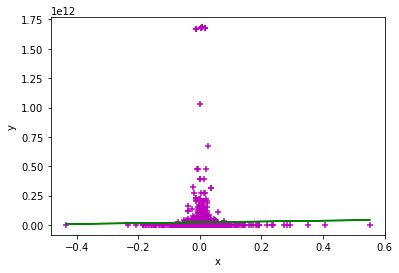

Estimated Coefficients:
b_0 =203205294.4590295 \ 
b_1 = 184281673.6565882


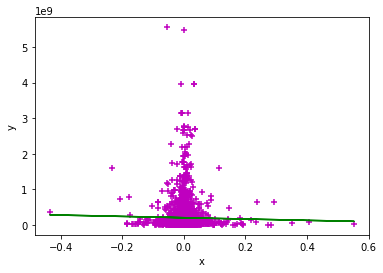

Estimated Coefficients:
b_0 =1.0769323049649864 \ 
b_1 = -2.369419099226715


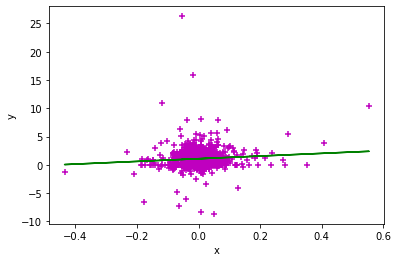

[[163017544.9474316, 22276022969.89295, 203205294.4590295, 1.0769323049649864], [-88146563.86056817, 34581713723.89672, -184281673.6565882, 2.369419099226715]]


In [4]:
# this program contains the regressions used in the 1minVolumeAnalysis file to determine whethere the stock is a buy

import numpy as np
import pandas as pd
import tweepy as tp
import time
import os
import matplotlib.pyplot as plt
import schedule
import time

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

data_file = pd.read_csv('allFinalStockData.csv')



def executeTweet():
    def weight_guess(x, y):

        n = np.size(x)
        mx, my = np.mean(x), np.mean(y)

        #standard deviations
        SSxy = np.sum(y*x) - n*my*mx
        SSxx = np.sum(x*x) - n*mx*mx

        b1 = SSxy / SSxx
        b0 = my - b1*mx
        return(b0,b1)




    def plot_regression_line(x, y, b):
        plt.scatter(x, y, color = "m", marker = "+", s = 30)
        ypred = b[0] + b[1] * x
        plt.plot(x, ypred, color = "g")

        plt.xlabel('x')
        plt.ylabel('y')

        plt.show()

    def main():
        # containing all stats for each team
        x = []
        y = []
        y2 = []
        y3 = []
        y4 = []
        
 
        #2980
        i = 0
        while i < 2926:
            
            x.append(data_file['Percent Change'][i])   
            y.append(data_file['Float Shares'][i])  
            y2.append(data_file['Market Cap'][i])
            y3.append(data_file['Shares Outstanding'][i]) 
            y4.append(data_file['Beta'][i])

            i = i + 1

        x = np.array(x)
        y = np.array(y)
        y2 = np.array(y2)
        y3 = np.array(y3)
        y4 = np.array(y4)
  
        w = weight_guess(x,y)
        w2 = weight_guess(x,y2)
        w3 = weight_guess(x,y3)
        w4 = weight_guess(x,y4)
    

        # printing a regression for each individual stat :

        print("Estimated Coefficients:\nb_0 ={} \ \nb_1 = {}".format(w[0], -1 * w[1]))
        plot_regression_line(x, y, w)
        
        print("Estimated Coefficients:\nb_0 ={} \ \nb_1 = {}".format(w2[0], -1 * w2[1]))
        plot_regression_line(x, y2, w2)
        
        print("Estimated Coefficients:\nb_0 ={} \ \nb_1 = {}".format(w3[0], -1 * w3[1]))
        plot_regression_line(x, y3, w3)
        
        print("Estimated Coefficients:\nb_0 ={} \ \nb_1 = {}".format(w4[0], -1 * w4[1]))
        plot_regression_line(x, y4, w4)

   
        multipliers = []
        weights = []

        multipliers.append(w[0])
        multipliers.append(w2[0])
        multipliers.append(w3[0])
        multipliers.append(w4[0])
  

        weights.append(w[1])
        weights.append(w2[1])
        weights.append(w3[1])
        weights.append(w4[1])

        mP = []
        # the multipliers are constants > 0 from the regression that are a multiple 
        mP.append(multipliers)
        mP.append(weights)
        return mP
    

    new = main()
    print(new)

final = executeTweet()

# observations from regression
    # average high gainers ALWAYS lie below ___
    # daily volume is bad measurement
        # need to do ratio of volume to normal
        # visually is higher multiple, higher gain
        
    # can find all parameters through this
        